In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int

    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    summary:str

In [3]:
def calculate_strike_rate(state: BatsmanState) -> BatsmanState:
    strike_rate = (state['runs'] / state['balls']) * 100

    return {'strike_rate': strike_rate}  # partial updation of the state

In [4]:
def calculate_balls_per_boundary(state: BatsmanState) -> BatsmanState:
    total_boundaries = state['fours'] + state['sixes']
    balls_per_boundary = state['balls'] / total_boundaries 
    
    return {'balls_per_boundary' : balls_per_boundary}

In [5]:
def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:
   boundary_percentage =((state['fours']*4) + (state['sixes']*6)) / state['runs'] * 100
   

   return {'boundary_percentage' : boundary_percentage}
   

In [10]:
def summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
    Strike Rate - {state['strike_rate']}
    Balls per Boundary - {state['balls_per_boundary']}
    Boundary Percentage - {state['boundary_percentage']}
    """
    
    return {'summary' : summary}

In [11]:
graph = StateGraph(BatsmanState)

graph.add_node("Strike_Rate", calculate_strike_rate)
graph.add_node("Balls_Per_Boundary", calculate_balls_per_boundary)
graph.add_node("Boundary_Percentage", calculate_boundary_percentage)    
graph.add_node("Summary", summary)


graph.add_edge(START, "Strike_Rate")
graph.add_edge(START, "Balls_Per_Boundary")
graph.add_edge(START, "Boundary_Percentage")

graph.add_edge("Strike_Rate", "Summary")
graph.add_edge("Balls_Per_Boundary", "Summary")
graph.add_edge("Boundary_Percentage", "Summary")

graph.add_edge("Summary", END)

workflow= graph.compile()

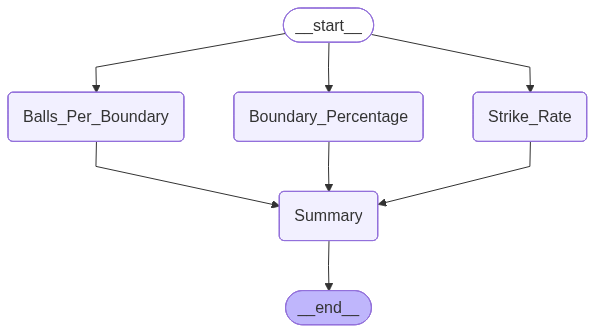

In [12]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [13]:
initial_state= {
    'runs': 100,
    'balls': 80,
    'fours': 8,
    'sixes': 4
}

workflow.invoke(initial_state)


{'runs': 100,
 'balls': 80,
 'fours': 8,
 'sixes': 4,
 'strike_rate': 125.0,
 'balls_per_boundary': 6.666666666666667,
 'boundary_percentage': 56.00000000000001,
 'summary': '\n    Strike Rate - 125.0\n    Balls per Boundary - 6.666666666666667\n    Boundary Percentage - 56.00000000000001\n    '}